abdullah Abusabba<br> alajmi7abdullah@gmail.com<br>   investigating Tmdb movie dataset

# Project-2: Investigate Tmdb movie Dataset ;

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
 <li><a href="#Cleaning ">Cleaning</a></li>   
<li><a href="#eda">Exploratory Data Analysis and Data visualization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, we will download the necessary library, explore our dataset and see what do we need to do in order to clean it. This dataset contain 10866 row and 21 columns.
Basically the dataset has a range of movies 🎥 from 1970 to 2015 and their revenue,
budget,cast and directors, and other columns as well, I will compare with the revenue so this will be my dependent.
<ul>
<li>Research Question 1: does the runtime effect movie income?</li>
<li>Research Question 2 :does a certain category effect on movies income ?</li>
<li>Research Question 3: Famous cast member  leads to great income?</li>
    </ul>

In [1]:
#Importing necessary Libraries that we will use during out analysis 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
#setting pandas columns,rows to display max
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(f'matplotlib:{matplotlib.__version__}')
print(f"numpy:{sns.__version__}")
print(f"pandas:{pd.__version__}")
print(f"numpy:{np.__version__}")

print('\npython:',sys.version)

matplotlib:3.1.1
numpy:0.9.0
pandas:0.25.1
numpy:1.17.2

python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [3]:
df=pd.read_csv("Tmdb-movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# a clear view of null values instead of df.info()
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### there are a lot of zeros in the numerical values as we saw in the last rows of the dataset this loop will print the number of zeros at the numerical columns

In [9]:
for i,v in enumerate(df.columns):
    if (df[v].dtype=='int' or df[v].dtype=='float'):
        print("count of zeros in ",v,"column:",df[v][df[v]==0].count())

count of zeros in  id column: 0
count of zeros in  popularity column: 0
count of zeros in  budget column: 5696
count of zeros in  revenue column: 6016
count of zeros in  runtime column: 31
count of zeros in  vote_count column: 0
count of zeros in  vote_average column: 0
count of zeros in  release_year column: 0
count of zeros in  budget_adj column: 5696
count of zeros in  revenue_adj column: 6016


In [10]:
# we will replace the zeros with NaN to make things easier
df=df.replace(0,np.nan)

In [11]:
# check if it worked
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [12]:
# changing dates columns dtype to datetime object 
df.sort_values('release_year',inplace=True)
df.release_year=pd.to_datetime(df.release_year,format='%Y')
df.release_date=pd.to_datetime(df.release_date)

In [13]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10172,1941,tt0053804,0.256779,NaN,NaN,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,NaN,Otto Preminger,NaN,israel|jewry|middle east conflict|epic,The theme is the founding of the state of Isra...,208.0,Action|Drama|History|War,Carlyle Productions,2060-03-27,14,6.1,1960-01-01,NaN,NaN
10141,539,tt0054215,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,NaN,Alfred Hitchcock,The master of suspense moves his cameras into ...,hotel|clerk|arizona|shower|rain,When larcenous real estate clerk Marion Crane ...,109.0,Drama|Horror|Thriller,Shamley Productions,2060-08-14,1180,8.0,1960-01-01,5.949601e+06,2.359350e+08


#### when we converted the release_date to datetime object, it reads 1960 as 2060, the below loop will fix that problem

In [14]:
Modifying_date=df.release_date.copy()
#copying this will avoid pandas copy warning 
for i in range(df.release_date.shape[0]):
    Modifying_date[i]=df.release_date[i].replace(year=df.release_year[i].year)

df.release_date=Modifying_date.copy()
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10172,1941,tt0053804,0.256779,NaN,NaN,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,NaN,Otto Preminger,NaN,israel|jewry|middle east conflict|epic,The theme is the founding of the state of Isra...,208.0,Action|Drama|History|War,Carlyle Productions,1960-03-27,14,6.1,1960-01-01,NaN,NaN
10141,539,tt0054215,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,NaN,Alfred Hitchcock,The master of suspense moves his cameras into ...,hotel|clerk|arizona|shower|rain,When larcenous real estate clerk Marion Crane ...,109.0,Drama|Horror|Thriller,Shamley Productions,1960-08-14,1180,8.0,1960-01-01,5.949601e+06,2.359350e+08


In [15]:
# sorting release_date and set it as index column
df.set_index('release_date',inplace=True)
df.sort_index(inplace=True)

In [16]:
# Double check 
df.query("release_date>2016")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
release_date,,,,,,,,,,,,,,,,,,,,


In [17]:
# i want to know the difference between budget,budget_adj revenue,revenue_adj
print('Correlation between budget and budget_adj:'
      ,df.budget.corr(df.budget_adj))
print('Correlation between revenue and revenue_adj:'
      ,df.revenue.corr(df.revenue_adj))

Correlation between budget and budget_adj: 0.9591309561889557
Correlation between revenue and revenue_adj: 0.9050105978964865


Text(0.5, 1, 'Correlation between budget and budget_adj')

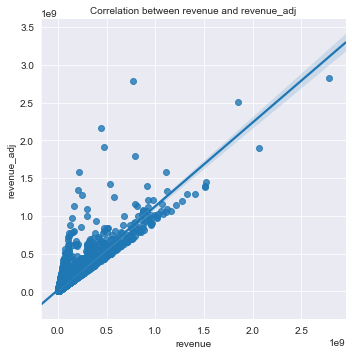

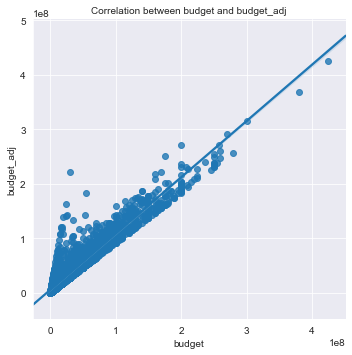

In [18]:
# visualize the correlation
sns.lmplot(x='revenue',y='revenue_adj',data=df)
plt.title('Correlation between revenue and revenue_adj',size=10)
sns.lmplot(x='budget',y='budget_adj',data=df)
plt.title('Correlation between budget and budget_adj',size=10)

# this indicates a really high correlation so I will consider _adj columns 
> ## ps:
1e8 is standard scientific notion, and here it indicates an overall scale factor for the y-axis. That is, if there's a 2 on the y-axis and a 1e8 at the top, the value at 2 actually indicates $2x1e8 = 2e8 = 2 x 10^8 = 200,000,000$.

In [19]:
# best practice to copy the dataset so we don't mess the original data
# drop unnecessary columns
copy_df=df.copy()
df.drop(columns=['id', 'imdb_id', 'budget', 'revenue',
       'tagline', 'keywords', 'overview',
       'production_companies','homepage'],inplace=True)

In [20]:
df.rename(columns={'genres':'category',
           'budget_adj':'budget',
           'revenue_adj':'income'},inplace=True)
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'runtime',
       'category', 'vote_count', 'vote_average', 'release_year', 'budget',
       'income'],
      dtype='object')

In [21]:
print("number of duplicates:",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("number of duplicates after drop:",df.duplicated().sum())

number of duplicates: 1
number of duplicates after drop: 0


# observation:
>we have some columns that are not necessary for our analysis so I  dropped them,  dtype of dates columns were changed to datetime and were sorted too. since budget,revenue are highly correlated with budget_adj,revenue_adj as we visualized them we will consider _adj as our main budget and income.

<a id='Cleaning'></a>

## Cleaning

>In this section of the report, we will clean columns separated by "|" in our data and fill null valus.

In [22]:
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'runtime',
       'category', 'vote_count', 'vote_average', 'release_year', 'budget',
       'income'],
      dtype='object')

In [23]:
df[['cast','category']].head(2)

,cast,category
release_date,,
1960-01-01,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,Horror
1960-01-01,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,Action|Drama|Western


In [24]:
# we will deal with columns that are saperated with "|" 
#by converting them into a list
df.cast=df.cast.str.split("|")
#df.keywords=df.keywords.str.split("|")
df.category=df.category.str.split("|")

In [25]:
df[['cast','category']].head(2)

,cast,category
release_date,,
1960-01-01,"[Peter Cushing, Martita Hunt, Yvonne Monlaur, ...",[Horror]
1960-01-01,"[Burt Lancaster, Audrey Hepburn, Audie Murphy,...","[Action, Drama, Western]"


<a id="explode"></a>
after searching for a way to access lists in pandas series and add them to new rows I've found the below method in stackoverflow by MaxU <a href="https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows/40449726#40449726">link</a>

In [26]:
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]


> **Note**: we will leave this aside for now and focus on how to deal with null values, what shall we do with them? if we dropped them then our analyst will lose some quality. let us check the mean and median of the missing values


In [27]:
df.isna().sum()

popularity           0
original_title       0
cast                76
director            44
runtime             31
category            23
vote_count           0
vote_average         0
release_year         0
budget            5696
income            6016
dtype: int64

In [28]:
df[['budget','income']].mean()

budget    3.688907e+07
income    1.151009e+08
dtype: float64

In [29]:
df[['budget','income']].median()

budget    2.271505e+07
income    4.395666e+07
dtype: float64

In [30]:
df[['budget','income']].std()

budget    4.196096e+07
income    1.988557e+08
dtype: float64

In [31]:
df[['budget','income']].describe()

,budget,income
count,5.169000e+03,4.849000e+03
mean,3.688907e+07,1.151009e+08
std,4.196096e+07,1.988557e+08
min,9.210911e-01,2.370705e+00
25%,8.102293e+06,1.046585e+07
50%,2.271505e+07,4.395666e+07
75%,5.008384e+07,1.316482e+08
max,4.250000e+08,2.827124e+09


>**Note**:we can see that the values differ from the mean value for the budget and income they have a high standard deviation, I'm thinking of doing  linear interpolation at missing data points using interpolate(method='time').

In [32]:
test=df[df.release_year<'1971-01-01']
test1=df[df.release_year>'2000-01-01']

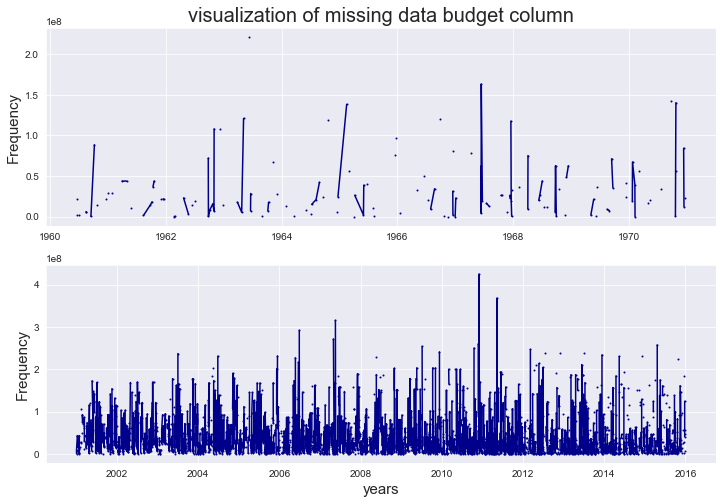

In [33]:
pd.plotting.register_matplotlib_converters()
fig,(ax,ax1)=plt.subplots(nrows=2,figsize=(12,8))

_=ax.plot(test.budget,markersize=1,marker='o'
           ,color='darkblue')
_=ax.set_title('visualization of missing data budget column',size=20)
_=ax1.plot(test1.budget,markersize=1,marker='o'
           ,color='darkblue')
_=ax1.set_ylabel('Frequency',size=15)
_=ax1.set_xlabel('years',size=15)
_=ax.set_ylabel('Frequency',size=15)

well the first figure we can see the line plot is not complete, whereas the second line plot looks weird and tight so the missing values are more in the early years. Therefore, we will use;
```python
DataFrame.interpolate(method='time')
```
as it will fill nan based on datetime index since it's not equally spaced intervals so method='linear' won't do much as this one does.


In [34]:
df.iloc[:10,:0]

""
release_date
1960-01-01
1960-01-01
1960-02-11
1960-02-22
1960-03-01
1960-03-27
1960-04-06
1960-05-18
1960-05-19


In [35]:
df.isnull().sum()

popularity           0
original_title       0
cast                76
director            44
runtime             31
category            23
vote_count           0
vote_average         0
release_year         0
budget            5696
income            6016
dtype: int64

In [36]:
df.iloc[20:40,9]

release_date
1960-08-29             NaN
1960-09-09             NaN
1960-09-14    2.211890e+05
1960-10-06    8.847561e+07
1960-10-07             NaN
1960-10-13             NaN
1960-10-23    1.474593e+07
1960-10-24             NaN
1960-12-18    2.211890e+07
1960-12-20             NaN
1960-12-21             NaN
1960-12-23             NaN
1961-01-01             NaN
1961-01-01    2.917944e+07
1961-01-01             NaN
1961-01-01             NaN
1961-01-25    2.917944e+07
1961-03-16             NaN
1961-03-30    4.376917e+07
1961-04-27    4.376917e+07
Name: budget, dtype: float64

In [37]:
df[['budget','income']]=df[['budget','income']].interpolate(
    method='time')

In [38]:
df.iloc[20:40,9]

release_date
1960-08-29    3.254638e+06
1960-09-09    1.169142e+06
1960-09-14    2.211890e+05
1960-10-06    8.847561e+07
1960-10-07    8.413857e+07
1960-10-13    5.811633e+07
1960-10-23    1.474593e+07
1960-10-24    1.487760e+07
1960-12-18    2.211890e+07
1960-12-20    2.312755e+07
1960-12-21    2.363188e+07
1960-12-23    2.464052e+07
1961-01-01    2.917944e+07
1961-01-01    2.917944e+07
1961-01-01    2.917944e+07
1961-01-01    2.917944e+07
1961-01-25    2.917944e+07
1961-03-16    4.057767e+07
1961-03-30    4.376917e+07
1961-04-27    4.376917e+07
Name: budget, dtype: float64

<h1><center>Before</center></h1>


|1960-10-23|3.616441e+07 |
|----------|----------|
|<mark>1960-10-24</mark>| <mark> NaN  </mark>  |
|----------|----------|
|1960-12-18|5.234807e+07 |
|----------|----------|
|<mark> 1960-12-20</mark>|  <mark> NaN  </mark>    |
|----------|----------|
|<mark> 1960-12-21</mark>|  <mark> NaN  </mark>    |
|----------|----------|
|1960-12-23|4.423780e+07 |
|----------|----------|

<h1><center>After</center></h1>

|1960-10-23|3.616441e+07 |
|----------|----------|
|<mark>1960-10-24</mark>| <mark> 3.645340e+07</mark>  |
|----------|----------|
|1960-12-18|5.234807e+07 |
|----------|----------|
|<mark> 1960-12-20</mark>|  <mark> 4.910396e+07</mark>    |
|----------|----------|
|<mark> 1960-12-21</mark>|  <mark> 4.748191e+07</mark>    |
|----------|----------|
|1960-12-23|4.423780e+07 |
|----------|----------|     



In [39]:
test_after=df[df.release_year<'1971-01-01']
test1_after=df[df.release_year>'2000-01-01']

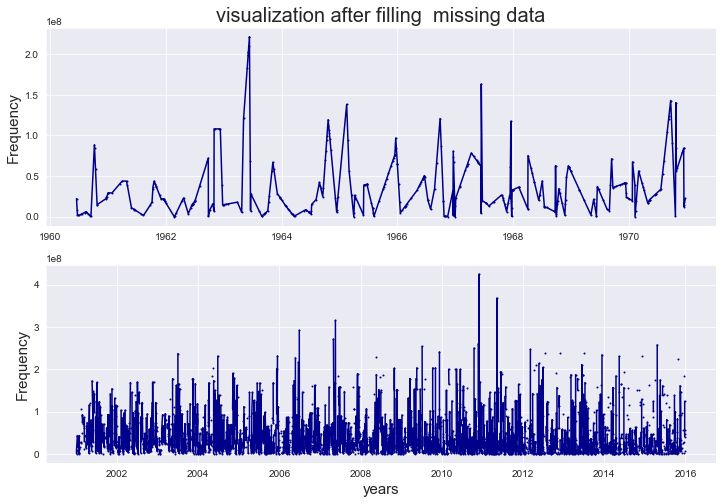

In [40]:
pd.plotting.register_matplotlib_converters()
fig,(ax,ax1)=plt.subplots(nrows=2,figsize=(12,8))

_=ax.plot(test_after.budget,markersize=1,marker='o'
           ,color='darkblue')
_=ax.set_title('visualization after filling  missing data',size=20)
_=ax.set_ylabel('Frequency',size=15)
_=ax1.plot(test1.budget,markersize=1,marker='o'
           ,color='darkblue')
_=ax1.set_ylabel('Frequency',size=15)
_=ax1.set_xlabel('years',size=15)

so this is our figure after we filled the missing values, we will plot the first figure next to e.ach others to have a better view.

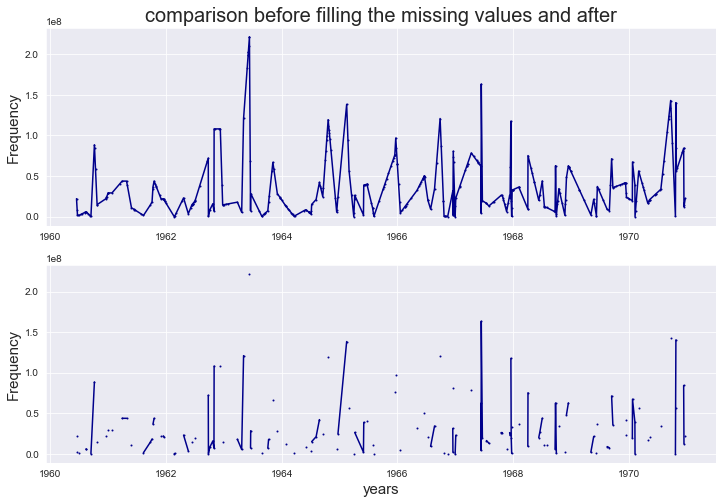

In [41]:
fig,(ax,ax1)=plt.subplots(nrows=2,figsize=(12,8))
_=ax.plot(test_after.budget,markersize=1,marker='o'
           ,color='darkblue')
_=ax.set_title('comparison before filling the missing values and after',
              size=20)
_=ax.set_ylabel('Frequency',size=15)
_=ax1.plot(test.budget,markersize=1,marker='o'
           ,color='darkblue')
_=ax1.set_ylabel('Frequency',size=15)
_=ax1.set_xlabel('years',size=15)
# we can see the frequency of income change 
# corresponding to years that the missing values weren't off

# Note:
>notice how the lines were before and after, see how the lines seems right and not too off or strange, this tells us the method we used to fill NaN is good.

In [42]:
df.isnull().sum()

popularity         0
original_title     0
cast              76
director          44
runtime           31
category          23
vote_count         0
vote_average       0
release_year       0
budget             9
income             9
dtype: int64

In [43]:
# dropping the remaining null, it will not effect the analysis 
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

popularity        0
original_title    0
cast              0
director          0
runtime           0
category          0
vote_count        0
vote_average      0
release_year      0
budget            0
income            0
dtype: int64

In [45]:
df.shape

(10694, 11)

<a id='eda'></a>
## Exploratory Data Analysis and Data Visualization 

>Now that we've trimmed and cleaned the data, we are ready to move on to exploration and create visualizations.

### Research Question 1: does the runtime effect movie income?

Text(0.5, 1, 'calculating the Pearson coefficient of correlation')

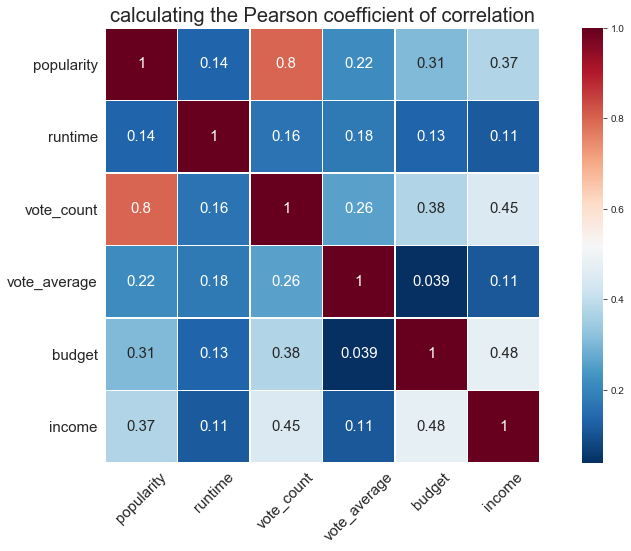

In [46]:
pearsoncorr=df.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,annot_kws={"size":15},
            linewidth=.5,square=True)
plt.xticks(rotation=45,size=15)
plt.yticks(rotation=0,size=15)
sns.set_style('dark')
#the edges were cut off so I've add 0.5 to the bottom and top
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.title("calculating the Pearson coefficient of correlation",size=20)
#co-efficient close to 1 means that there’s
#a very strong positive correlation between the two variables

# Note: 
we can se that popularity and vot_count has a 0.8, let's see them in a scatter plot.
>read more about Pearson Coefficient <a href=https://en.wikipedia.org/wiki/Pearson_correlation_coefficient>link</a>

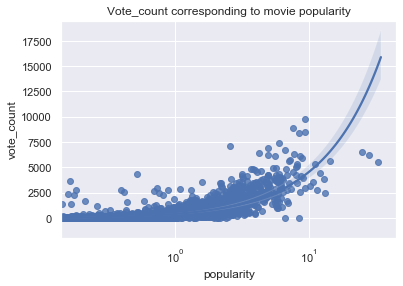

In [47]:
sns.set(color_codes=True)
sns.regplot(x='popularity',y='vote_count',data=df)
plt.title("Vote_count corresponding to movie popularity")
plt.xscale('log')
#log scale to see them better

In [48]:
df.popularity.describe()

count    10694.000000
mean         0.654116
std          1.006052
min          0.000188
25%          0.211521
50%          0.388126
75%          0.722814
max         32.985763
Name: popularity, dtype: float64

Text(0.5, 1, 'year corresponding to movie income, the points get bigger for vote count')

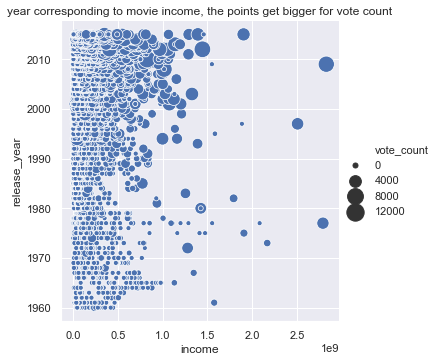

In [49]:
sns.relplot(x='income',y='release_year',size='vote_count',
            data=df, sizes=(25, 300))
plt.title("year corresponding to movie income, the points get bigger for vote count")

# Note:
so the above graphs tells us that release year doesn't nacecary indicates high or low income, but we can see that movie at the top 2010 and above tends to have high vote count therefore higher income movies Itself has increased as well as vote count. also whenever the movie is popular vote count will increase, therefore income will have a higher chance to increase 

Text(0.5, 1, 'line chart of income corresponding to years')

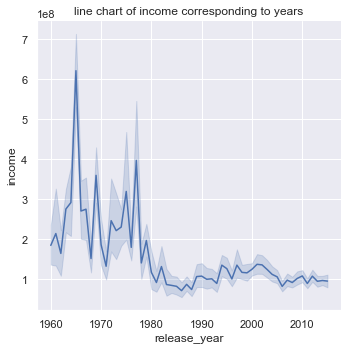

In [50]:
sns.relplot(x="release_year", y="income", kind="line", data=df)
plt.title("line chart of income corresponding to years")
#income has decreased over the years, early years movie 
#tend to have higher revenue

Text(0.5, 1, 'line chart of vote count corresponding to years')

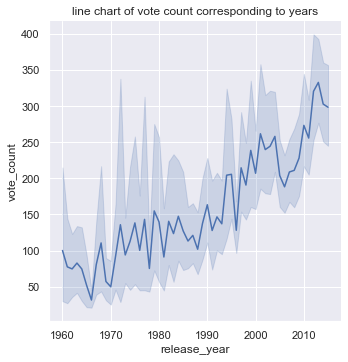

In [51]:
sns.relplot(x="release_year", y="vote_count", kind="line", data=df)
plt.title("line chart of vote count corresponding to years")


# Note:
so here we see that income decreased over the years, whereas vote count increased. but in the next year's income will increase because of the vote count has relationship with movie income and popularity, so the huge decrease of movie count for the new movies will raise up again in the futures.

Text(0.5, 1.0, 'this graph shows that the data are skewed to the right')

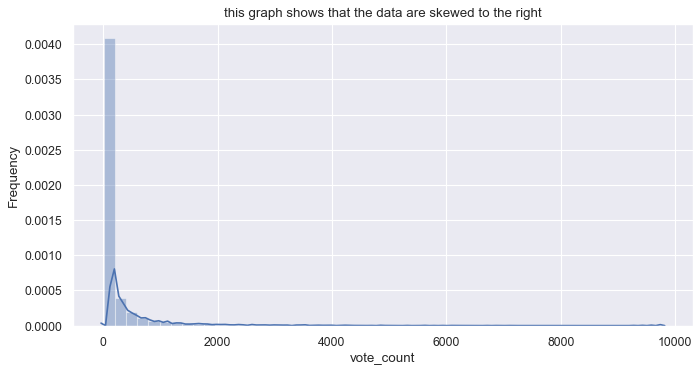

In [52]:
plt.figure(figsize=(10,5),dpi=80)
sns.distplot(df["vote_count"])
plt.ylabel("Frequency")
plt.title("this graph shows that the data are skewed to the right")

Text(0.5, 1.0, ' this graph shows that the data are skewed to the right')

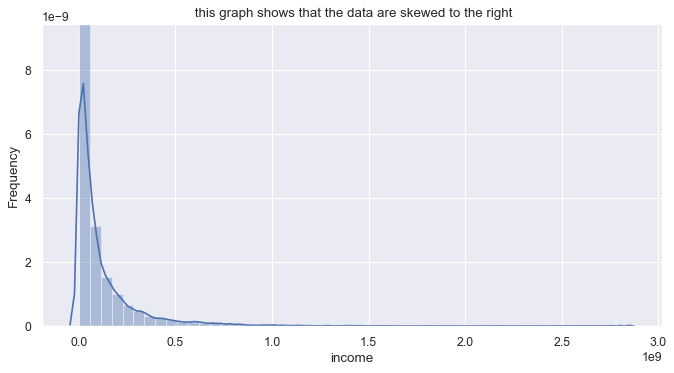

In [53]:
plt.figure(figsize=(10,5),dpi=80)
sns.distplot(df["income"])
plt.ylabel("Frequency")
plt.title(" this graph shows that the data are skewed to the right")

# both of income and  vote count are skewed to the right

Text(0, 0.5, 'Frequency')

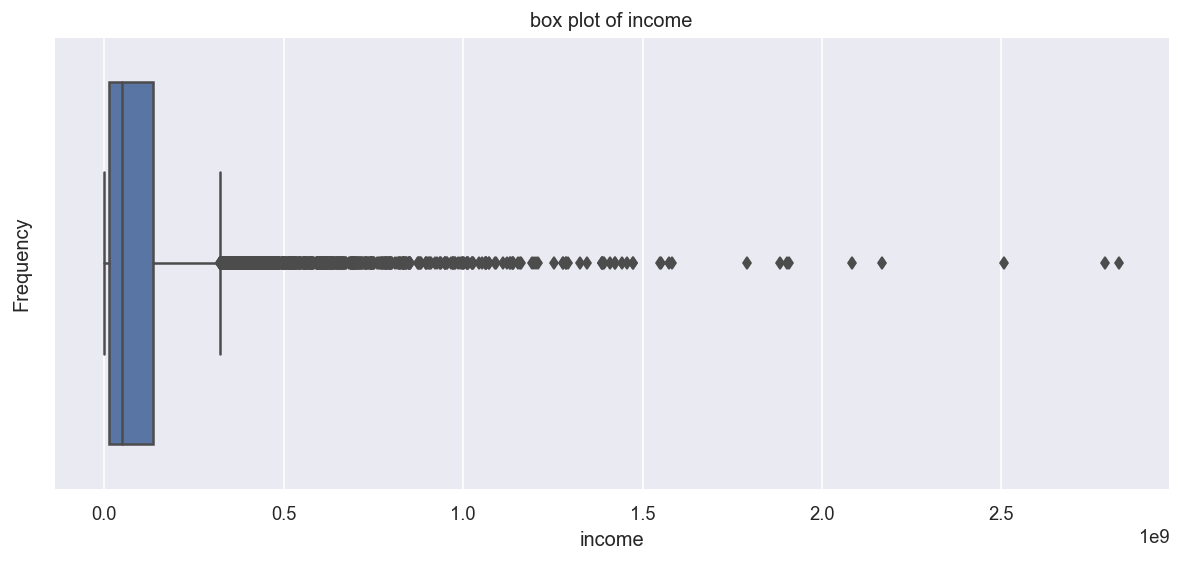

In [54]:
plt.figure(figsize=(12,5),dpi=120)
sns.boxplot(df["income"])
plt.title("box plot of income")
plt.ylabel("Frequency")

In [55]:
df["income"].describe()

count    1.069400e+04
mean     1.149404e+08
std      1.846654e+08
min      2.370705e+00
25%      1.283784e+07
50%      4.898510e+07
75%      1.369396e+08
max      2.827124e+09
Name: income, dtype: float64

Text(0, 0.5, 'Frequency')

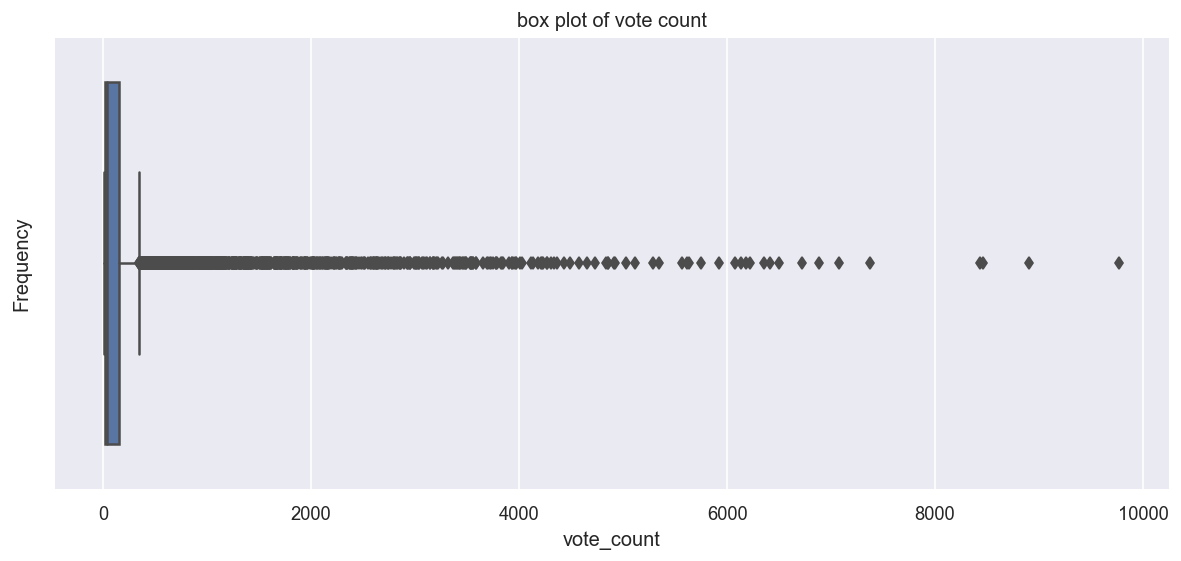

In [56]:
plt.figure(figsize=(12,5),dpi=120)
ax=sns.boxplot(df["vote_count"])
plt.title("box plot of vote count")
plt.ylabel("Frequency")

In [57]:
print('income mean:',df.income.mean())
print('income median:',df.income.median())
print('income mode:',df.income.mode())
print("*"*50)
print('vote_count mean:',df.vote_count.mean())
print('vote_count median:',df.vote_count.median())
print('vote_count mode:',df.vote_count.mode())

income mean: 114940415.43054655
income median: 48985095.8257074
income mode: 0    5.188439e+07
dtype: float64
**************************************************
vote_count mean: 220.50205722835236
vote_count median: 39.0
vote_count mode: 0    10
dtype: int64


## summary :
as we can see the distribution of both income and vote count we can Summarize this as:<br> the distirbution of income and vote_count are right skewd they have a long tail that extends to the positive side. we found that:<ul>
<li>mean greater than the mode</li>
<li>median greater than the mode</li>
<li>mean greater than median</li></ul>

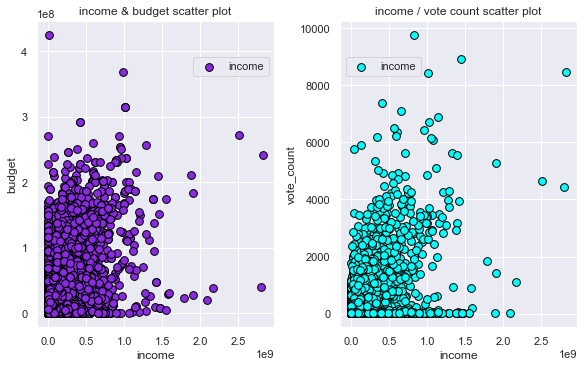

In [58]:
fig,(ax,ax1)=plt.subplots(ncols=2,figsize=(8,5),
                         constrained_layout=True)
# import matplotlib.colors as mcolors
# cmap=mcolors.ListedColormap(["black","yellowgreen"])
_=ax.scatter('income','budget',data=df,color='blueviolet'
             ,marker='o' ,s=60,edgecolor='black',label='income')
_=ax1.scatter('income','vote_count',data=df,color='cyan'
             ,marker='o',s=60,edgecolor='black',label='income')
_=ax.set_title('income & budget scatter plot')
_=ax.set_ylabel('budget')
_=ax.set_xlabel('income')
_=ax1.set_title('income / vote count scatter plot')
_=ax1.set_ylabel('vote_count')
_=ax1.set_xlabel('income')
_=ax.legend(bbox_to_anchor=(0, .4, 1, 0.5))
_=ax1.legend(bbox_to_anchor=(0, .4, 1, 0.5))

In [59]:
print("vote_count correction with income"
      ,df.vote_count.corr(df.income))

print("budget correction with income"
      ,df.budget.corr(df.income))

vote_count correction with income 0.45126068004617487
budget correction with income 0.47699491413853956


# Note:
>here we see two scatter plots of budget, income and income, vote count. our variable Is affected by these other variables, but slightly, the correlation between them is low.

### Research Question 2 :does a certain category effect on movies income ?

>Remember our explode function? now we will use it to hash list values in our columns.
<a href="#explode">go to explode function</a>

In [60]:
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'runtime',
       'category', 'vote_count', 'vote_average', 'release_year', 'budget',
       'income'],
      dtype='object')

In [61]:
explode_df=df.copy()
explode_df.drop(explode_df.columns.difference(
    ['popularity', 'original_title','genres','category','release_year'
     ,'budget','income','vote_average','vote_count','cast'])
                , 1, inplace=True)

In [62]:
explode_df=explode(explode_df,['category'])
explode_df=explode(explode_df,['cast'])
explode_df.columns

Index(['popularity', 'original_title', 'cast', 'category', 'vote_count',
       'vote_average', 'release_year', 'budget', 'income'],
      dtype='object')

In [63]:
explode_df.shape

(130950, 9)

In [64]:
df.shape

(10694, 11)

In [65]:
explode_df.head()

,popularity,original_title,cast,category,vote_count,vote_average,release_year,budget,income
0,0.947307,The Apartment,Jack Lemmon,Comedy,235,7.9,1960-01-01,2.211890e+07,1.843242e+08
1,0.947307,The Apartment,Shirley MacLaine,Comedy,235,7.9,1960-01-01,2.211890e+07,1.843242e+08
2,0.947307,The Apartment,Fred MacMurray,Comedy,235,7.9,1960-01-01,2.211890e+07,1.843242e+08
3,0.947307,The Apartment,Ray Walston,Comedy,235,7.9,1960-01-01,2.211890e+07,1.843242e+08
4,0.947307,The Apartment,Jack Kruschen,Comedy,235,7.9,1960-01-01,2.211890e+07,1.843242e+08


In [66]:
top_category=explode_df.category.value_counts()[:20]

In [67]:
top_category

Drama              23418
Comedy             18385
Thriller           14387
Action             11760
Romance             8445
Horror              8029
Adventure           7232
Crime               6722
Science Fiction     6005
Family              5872
Fantasy             4459
Mystery             4003
Animation           3068
Documentary         1903
Music               1898
History             1620
War                 1312
Foreign              863
Western              804
TV Movie             765
Name: category, dtype: int64

Text(0, 0.5, 'Frequency')

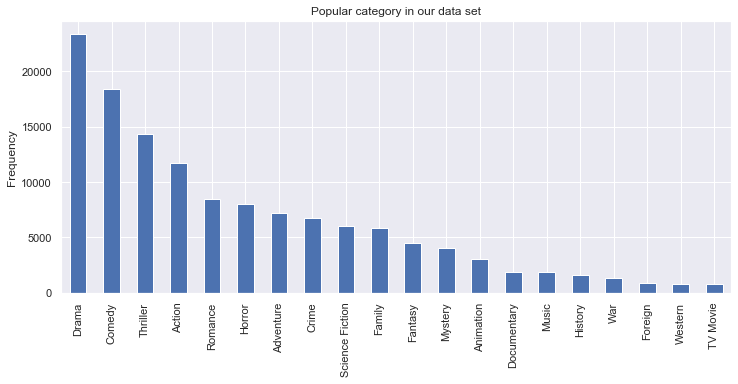

In [68]:
plt.figure(figsize=(12,5))
explode_df['category'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.yticks()
plt.title("Popular category in our data set")
plt.ylabel("Frequency")

#### the above graph shows the most frequent movie category 

Text(0.5, 0, 'category')

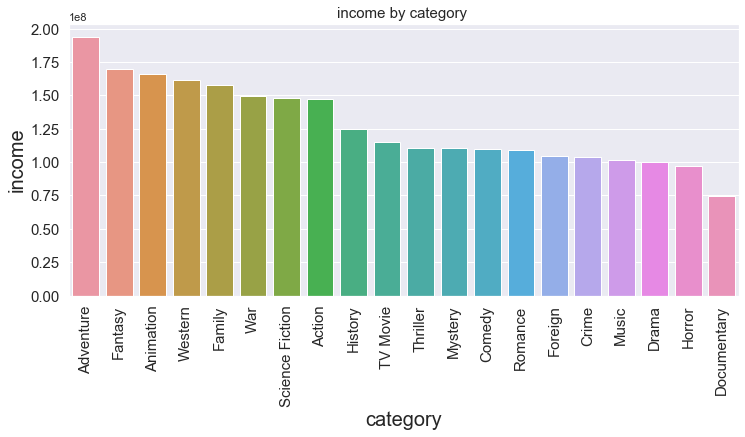

In [69]:
plt.figure(figsize=(12,5))
gb_category=explode_df.groupby('category').aggregate(np.mean)
gb_category=gb_category.sort_values(by='income',ascending=False)
gb_category=gb_category.reset_index()
bp=sns.barplot(x='category',y='income',data=gb_category)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)
plt.title('income by category ',size=15)
plt.ylabel('income',size=20)
plt.xlabel('category',size=20)

# Note:
this indicates that adventrue movies occurred 7232 times and among top 10 most repeated category it has the highest income in our dataset, this answers our question.

In [70]:
gb_budget=explode_df.groupby('category').aggregate(np.mean).reset_index()
gb_budget=gb_budget[['category','income','budget']]
gb_budget.set_index('category',inplace=True)
gb_budget=gb_budget.sort_values(by='income',ascending=False)

Text(0.5, 1.0, 'income & budget based on movies category ')

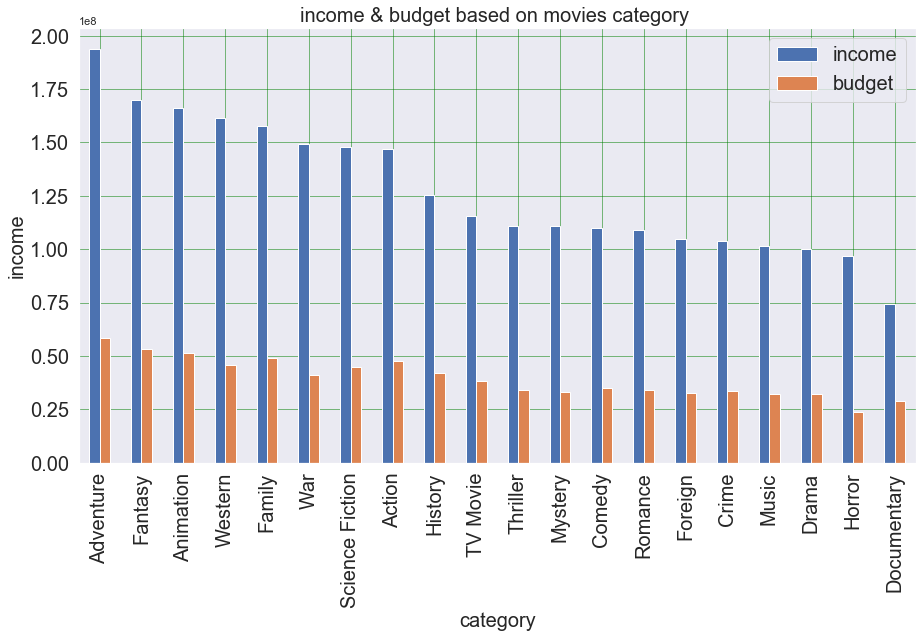

In [71]:
ax=gb_budget.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(loc=1, prop={'size': 20})
plt.ylabel('income',size=20)
plt.xlabel('category',size=20)
plt.title("income & budget based on movies category ",size=20)

# observation:
Well, this graph tells us that most frequent movie category don't have high incomes, drama count is the most among them, but when it comes to movie income it's at the last three places. Also, we can see that has a relationship with movie income If the budget was high probably will result in high income

### Research Question 3: Famous cast member  leads to great income?
> as we did before, we will count most repeated actors and plot them then we'll groupby 'cast' and take the mean or median to see if it has high income.

In [72]:
famous_actors=explode_df.cast.value_counts()[:20].index
cast_df=explode_df[explode_df.cast.isin(famous_actors)]

In [73]:
cast_gb=cast_df.groupby('cast')['income']
cast_gb=cast_gb.aggregate(np.median)
cast_gb=cast_gb.reset_index()
cast_gb=cast_gb.sort_values('income',ascending=False)

Text(0.5, 0, 'income')

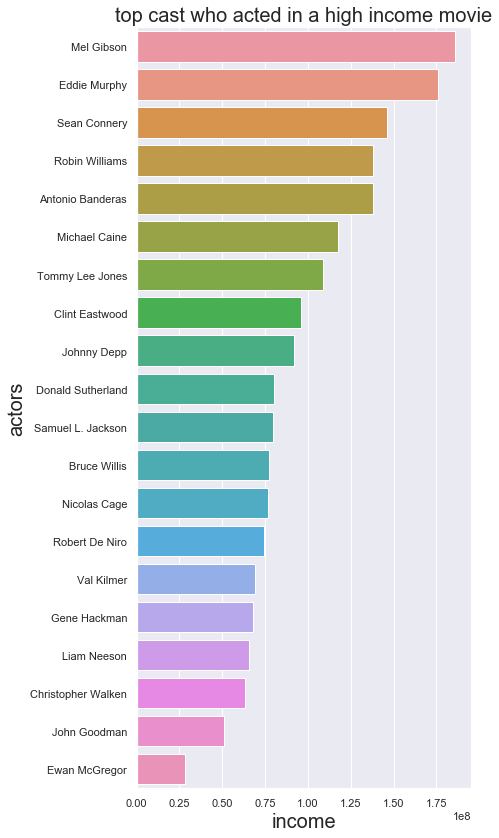

In [74]:
fig,ax=plt.subplots(figsize=(6,14))
sns.barplot(cast_gb['income'],cast_gb['cast'],order=cast_gb['cast'])
ax.set_title("top cast who acted in a high income movie",size=20)
ax.set_ylabel('actors',size=20)
ax.set_xlabel('income',size=20)

#### top actors based on income

Text(0.5, 0, 'cast')

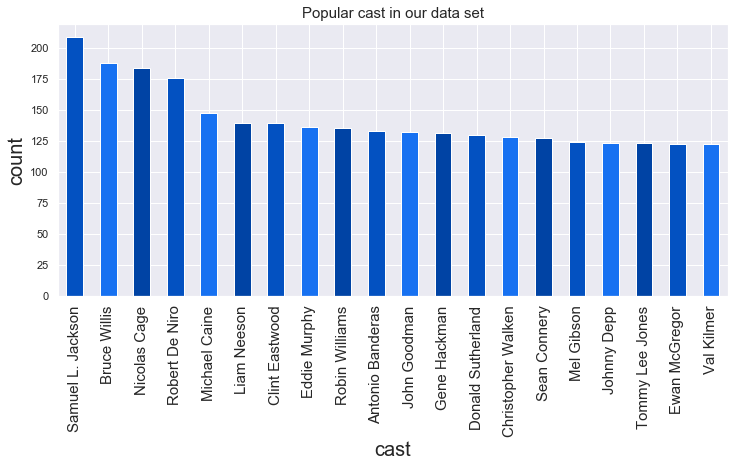

In [75]:
plt.figure(figsize=(12,5))
explode_df.cast.value_counts()[:20].plot(kind='bar'
                                         ,color=['#0351C1'
                                                  ,'#1771F1'
                                                ,'#0043A4'
                                                ])
plt.xticks(rotation=90,size=15)
plt.title("Popular cast in our data set",size=15)
plt.ylabel('count',size=20)
plt.xlabel('cast',size=20)

# observation:
the above two graphs shows us clearly that it doesn't matter whether the actor name occurs frequently in the dataset affect the income, but those who acted in a high movie income do affect.

<a id='conclusions'></a>
## Conclusions

<ul>
<li>most frequently occurred movie category doesn't effect income.</li>
<li>famous actors or most frequently occurred in our dataset don't have high movie income. </li>
<li>vote_count in someway will affect income but not necessarily.</li>
<li>popularity is increasing over the years which will increase of vote count and that will lead to high movie income.</li>
<li>vote count is increasing over the years this indicates a slight chance that maybe movies in the future will have high income.</li>
</ul>
<h1>Limitations:</h1>
This Analysis doesn't include all of the columns and it may be wrong for some reason, the analysis does not state or imply that one change causes another based solely on a correlation, this is a udacity project to be reviewed by their team. We only included  some of the columns which are budget, income, popularly, cast, vote_count and category. This analysis says if any movie to be released with good budget amount under these categories  (Adventure, Fantasy, Animation, Western) and a cast includes any one of these actors (Mel Gibson, Eddie Murphy, Sean Connery, Antonio Banderas) and it had a high vote count afterwards, then it will probably have high income also our analysis says that movies in the feature tends to have high income. 